In [1]:
import pandas as pd
import numpy as np
import datetime

from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import MinMaxScaler

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('process_df.csv')

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,player_name,birthday,height,weight,date,overall_rating,potential,crossing,finishing,heading_accuracy,...,low,medium,Forward,Goalkeeper,Midfield,Eredivisie,LaLiga,Ligue 1,Premier League,Serie A
0,Aaron Cresswell,1989-12-15,170.18,146,2014-12-05,71.0,77.0,78.0,50.0,56.0,...,0,1,0,0,0,0,0,0,1,0
1,Aaron Cresswell,1989-12-15,170.18,146,2014-11-07,71.0,77.0,78.0,50.0,56.0,...,0,1,0,0,0,0,0,0,1,0
2,Aaron Cresswell,1989-12-15,170.18,146,2014-09-18,70.0,77.0,77.0,50.0,51.0,...,0,1,0,0,0,0,0,0,1,0
3,Aaron Cresswell,1989-12-15,170.18,146,2014-05-02,70.0,79.0,77.0,50.0,51.0,...,0,1,0,0,0,0,0,0,1,0
4,Aaron Cresswell,1989-12-15,170.18,146,2014-04-04,70.0,79.0,77.0,50.0,51.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,Zouhair Feddal,1989-01-01,190.50,172,2013-11-15,62.0,66.0,45.0,25.0,67.0,...,0,1,0,0,0,0,0,0,0,1
10551,Zouhair Feddal,1989-01-01,190.50,172,2013-09-20,62.0,66.0,45.0,25.0,67.0,...,1,0,0,0,0,0,0,0,0,1
10552,Zoumana Camara,1979-04-03,182.88,168,2007-08-30,77.0,78.0,42.0,27.0,77.0,...,1,0,0,0,0,0,0,1,0,0
10553,Zoumana Camara,1979-04-03,182.88,168,2007-02-22,77.0,78.0,42.0,27.0,77.0,...,1,0,0,0,0,0,0,1,0,0


In [4]:
df.columns

Index(['player_name', 'birthday', 'height', 'weight', 'date', 'overall_rating',
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'league_left', 'joined_league', 'fee_in_pounds',
       'transfermarkt_val', 'position', 'right', 'high', 'low', 'medium',
       'Forward', 'Goalkeeper', 'Midfield', 'Eredivisie', 'LaLiga', 'Ligue 1',
       'Premier League', 'Serie A'],
      dtype='object')

In [5]:
df['transfer_age'] = str(pd.to_datetime(df['date']) - pd.to_datetime(df['birthday'])).split()[1]
df['transfer_age'] = df['transfer_age'].apply(lambda x: str(x))

In [6]:
df['transfer_age']

0        9121
1        9121
2        9121
3        9121
4        9121
         ... 
10550    9121
10551    9121
10552    9121
10553    9121
10554    9121
Name: transfer_age, Length: 10555, dtype: object

In [7]:
df['transfer_year'] = pd.DatetimeIndex(pd.to_datetime(df['date'], format='%Y/%m/%d')).year
df['transfer_month'] = pd.DatetimeIndex(pd.to_datetime(df['date'], format='%Y/%m/%d')).month

In [8]:
X = df[['player_name', 'transfer_age', 'birthday', 'height', 'weight', 'date', 'overall_rating',
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'right', 'high',
       'low', 'medium', 'Forward', 'Goalkeeper', 'Midfield', 'Eredivisie',
       'LaLiga', 'Ligue 1', 'Premier League', 'Serie A']]

y = 'fee_in_pounds'

In [9]:
df = df.drop(df[df['fee_in_pounds'].isnull()].index)
df = df.drop(df[df['fee_in_pounds'] < 0].index)

In [10]:
df['mils'] = 1/1000000 * df['fee_in_pounds']

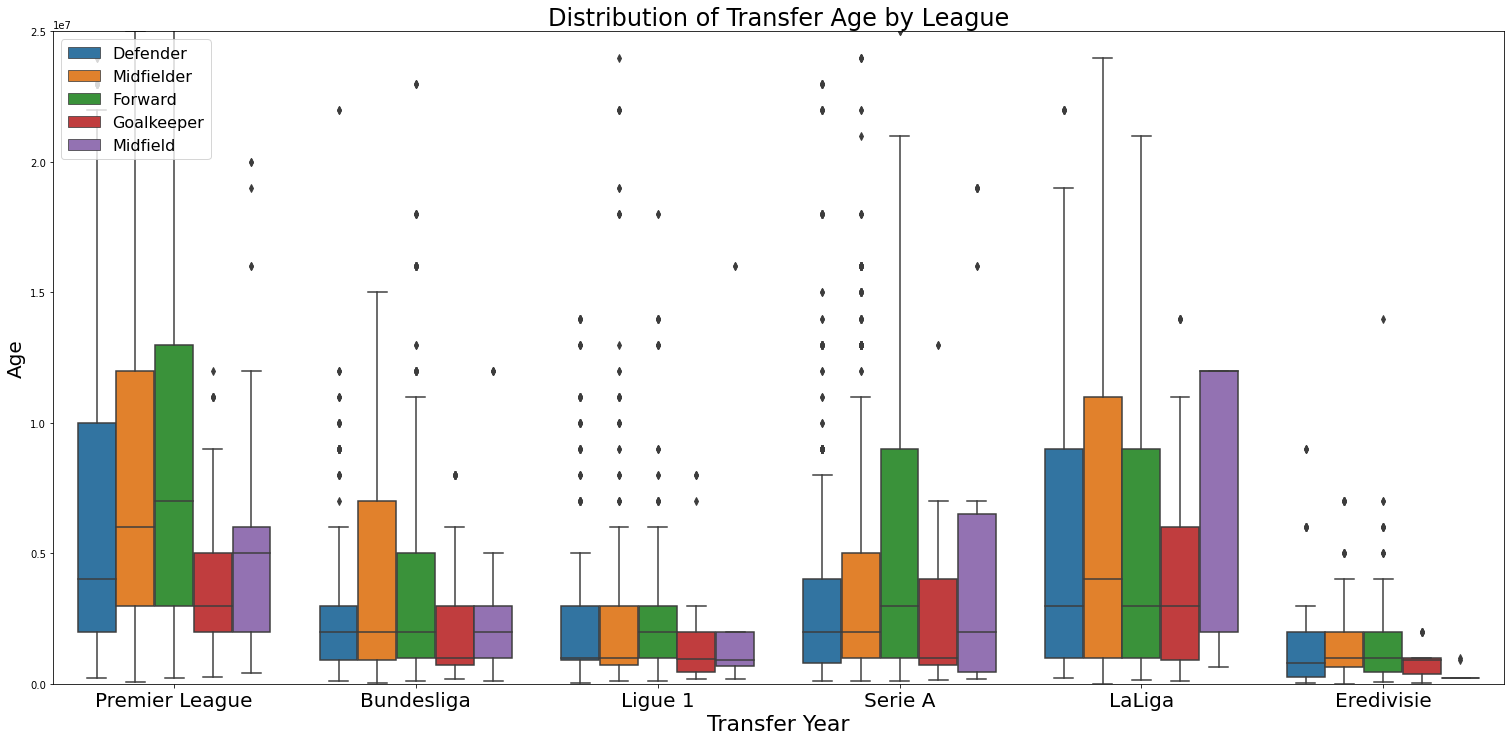

In [11]:
plt.figure(figsize=(26,12))
sns.boxplot(x='joined_league', y='fee_in_pounds', data=df, hue='position')
plt.title('Distribution of Transfer Age by League', fontsize=24)
plt.xticks(fontsize=20)
plt.xlabel('Transfer Year', fontsize=22)
plt.ylabel('Age', fontsize=20)
plt.ylim([0, 25000000])
plt.legend(loc=2,prop={'size': 16})

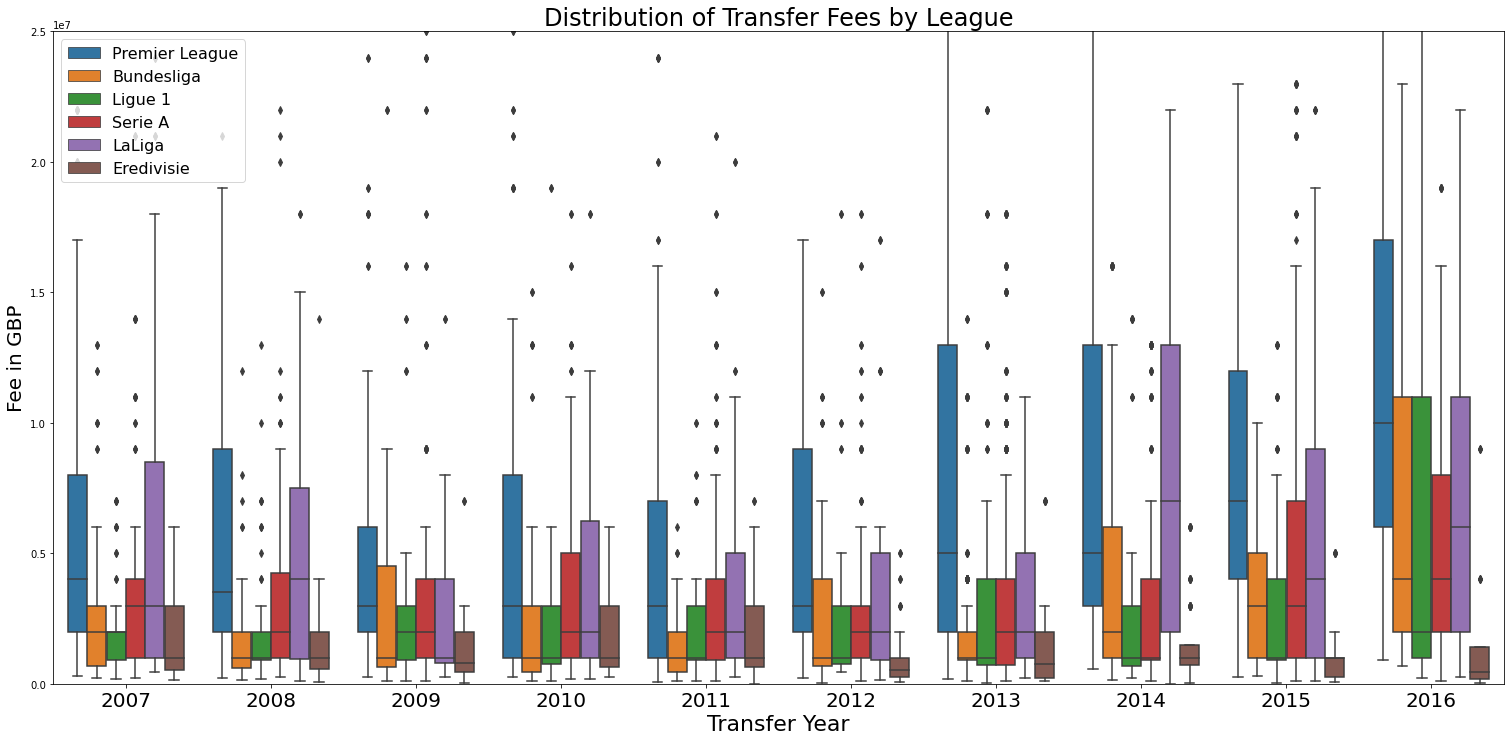

In [12]:

plt.figure(figsize=(26,12))
sns.boxplot(x='transfer_year', y='fee_in_pounds', data=df, hue='joined_league')
plt.title('Distribution of Transfer Fees by League', fontsize=24)
plt.xticks(fontsize=20)
plt.xlabel('Transfer Year', fontsize=22)
plt.ylabel('Fee in GBP', fontsize=20)
plt.ylim([0,25000000])
plt.legend(loc=2,prop={'size': 16})

In [14]:
df['birthday'] = df['birthday'].astype(str)
df['birthday'] = df['birthday'].apply(lambda x: x[0:4])

In [15]:
df['birthday']

0        1989
1        1989
2        1989
3        1989
4        1989
         ... 
10550    1989
10551    1989
10552    1979
10553    1979
10554    1982
Name: birthday, Length: 10539, dtype: object

In [16]:
df['transfer_age'] = df['transfer_age'].astype(str)
df['transfer_age'] = df['transfer_age'].apply(lambda x: x[2:6])

In [17]:
df['transfer_age']

0        21
1        21
2        21
3        21
4        21
         ..
10550    21
10551    21
10552    21
10553    21
10554    21
Name: transfer_age, Length: 10539, dtype: object

In [18]:
df['date'] = df['date'].astype(str)
df['date'] = df['date'].apply(lambda x: x[0:4])

In [19]:
df['date']

0        2014
1        2014
2        2014
3        2014
4        2014
         ... 
10550    2013
10551    2013
10552    2007
10553    2007
10554    2008
Name: date, Length: 10539, dtype: object

In [20]:
keep = ['transfer_age', 'birthday', 'height', 'weight', 'date', 'overall_rating',
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'right', 'high',
       'low', 'medium', 'Forward', 'Goalkeeper', 'Midfield', 'Eredivisie',
       'LaLiga', 'Ligue 1', 'Premier League', 'Serie A']

In [21]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="most_frequent")
df_filled = (imp.fit_transform(df))

In [1]:
X = df_filled[['transfer_age', 'birthday', 'height', 'weight', 'date', 'overall_rating',
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'right', 'high',
       'low', 'medium', 'Forward', 'Goalkeeper', 'Midfield', 'Eredivisie',
       'LaLiga', 'Ligue 1', 'Premier League', 'Serie A']]
y = df_filled[['fee_in_pounds']]

NameError: name 'df_filled' is not defined

In [ ]:
s = StandardScaler()
X_scaled = pd.DataFrame(s.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

reg_score_df= pd.DataFrame(columns = ['Test_name','CV_mean','CV_min','CV_max',
                                      'CV_std','train_r^2_score','test_r^2_score'])

coef_df = pd.DataFrame(index=range(0,52))

X1 = X_train
X2 = X_test
y1 = y_train
y2 = y_test


ridge_alphas = np.logspace(0, 5, 200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X1, y1)

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X1, y1)


mods = [LinearRegression(),Ridge(alpha=optimal_ridge.alpha_),Lasso(alpha=optimal_lasso.alpha_)]

for model_type in mods:

    m = model_type
    test_name = str(m)[:str(m).index('(')]
    scores = cross_val_score(m, X1, y1, cv=5)
    CV_mean = scores.mean()
    CV_max = scores.max()
    CV_min = scores.min()
    CV_std = scores.std()
    m.fit(X1, y1)
    train_score = m.score(X1, y1)
    test_score = m.score(X2, y2)

    reg_score_df.loc[len(reg_score_df)] = [test_name,CV_mean, CV_min, CV_max, CV_std, train_score,
                                           test_score]
   
    coefs = pd.DataFrame({'variable':X_feature_names,
                          'coef':m.coef_,
                          'abs_coef':np.abs(m.coef_)})

    coefs.columns = ['abs_coef','coef',test_name]

    coefs.sort_values('abs_coef',inplace = True, ascending = False)
    coefs.drop('abs_coef',axis = 1, inplace=True)
    coefs.reset_index(inplace = True, drop=True)

    coefs = coefs[[test_name,'coef']]

    coefs.loc[-1] = ['intercept',m.intercept_] 
    coefs.index = coefs.index + 1  
    coefs = coefs.sort_index()  
    coef_df = pd.concat([coef_df, coefs], axis=1)
